In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
try:
    import plotly.graph_objects as go
except:
    print('pip install plotly for full plots')

# Optimization via Gradient Descent

In this laboratory session, we want to study methods to solve the general optimization problem where,
given a function $f : \mathbb{R}^n → \mathbb{R}$, we want to compute

$ x^* = \underset{x ∈\mathbb{R}^n}{arg\,min}\;f(x) $

In particular, we will consider the situation where $f(x)$ is at least differentiable, which implies that we can compute its gradient $∇f(x)$.

In this framework, one of the most common way to approach $x^*$ is to use the Gradient Descent (GD)
method, which is an iterative algorithm that, given an initial iterate $x ∈\mathbb{R}^n$ and a positive parameter called
step size $α_k > 0$ for each iteration, computes

$$ x_{k+1} = x_k − α_k∇f(x_k) $$

You are asked to implement the GD method in Python and to test it with some remarkable functions.


- Q. Write a script that implement the GD algorithm, with the following structure:


        **Input**:

                f: the function f(x) we want to optimize.

                It is supposed to be a Python function, not an array.

                grad_f: the gradient of f(x). It is supposed to be a Python function, not an array.

                x0: an n-dimensional array which represents the initial iterate.

                kmax: an integer. The maximum possible number of iterations (to avoid infinite loops)

                tolf: small float. The relative tollerance of the algorithm.

                Convergence happens if ||grad_f(x_k)||_2 < tolf ||grad_f(x_0)||_2
                tolx: small float. The tollerance in the input domain.

        Convergence happens if ||x_{k} - x_{k-1}||_2 < tolx.

        Pay attention to to the first iterate.
        

        **Output**:

                x: an array that contains the value of x_k FOR EACH iterate x_k (not only the latter).

                k: an integer. The number of iteration needed to converge. k < kmax.

                f_val: an array that contains the value of f(x_k) FOR EACH iterate x_k.

                grads: an array that contains the value of grad_f(x_k) FOR EACH iterate x_k.

                err: an array the contains the value of ||grad_f(x_k)||_2 FOR EACH iterate x_k.

        For the moment, consider a fixed value of α > 0.

<br>

- In the utils folder, you can find a file which is named backtracking.py that contains an implementation of the backtracking algorithm for the GD method. That function works as follows:

        **Input**:
        
                f: the function f(x) we want to optimize.

                It is supposed to be a Python function, not an array.

                grad_f: the gradient of f(x). It is supposed to be a Python function, not an array.

                x: an array. The actual iterate x_k for which you want to find the correct value for alpha.

        **Output**:

                alpha: a float. The correct step size for the next iteration.

        Modify the code for the GD method to let it be able to use the backtracking algorithm for the choice of the step size

In [ ]:
# Import the backtracking file from the folder utils to run the backtracking.
from utils import backtracking

def backtracking(f, grad_f, x):
    """
    This function is a simple implementation of the backtracking algorithm for
    the GD (Gradient Descent) method.
    
    f: function. The function that we want to optimize.
    grad_f: function. The gradient of f(x).
    x: ndarray. The actual iterate x_k.
    """
    alpha = 1
    c = 0.8
    tau = 0.25
    
    while f(x - alpha * grad_f(x)) > f(x) - c * alpha * np.linalg.norm(grad_f(x), 2) ** 2:
        alpha = tau * alpha
    return alpha

Implement the GD method.

I added an optional parameter useBackTracking in order of being able to toggle the use of the backtracking when calling the function (default=True)

In [3]:
# The gradient_descent implementation.
def gradient_descent(f, grad_f, x0, kmax, tolf, tolx, LR=0.001, useBackTracking=True):
    
    # Initialization
    k = 0

    x = np.empty((kmax,)+x0.shape)
    f_val = np.empty(kmax)
    grads = np.empty((kmax,)+x0.shape)
    err = np.empty(kmax)
    
    # Assign the values for the first iteration
    x[k]=x0
    f_val[k] = f(x0)
    grads[k] = grad_f(x0)
    err[k] = np.linalg.norm(grad_f(x0))
    
    # Choose step size
    alpha = LR
    
    # Handle the condition for the first iteration
    k+=1
    x[k]=x[k-1]-alpha*grad_f(x[k-1])
    f_val[k] = f(x[k])
    grads[k] = grad_f(x[k])
    err[k] = np.linalg.norm(grad_f(x[k]))


    
    # Start the iterations
    while (k<kmax-1) and (np.linalg.norm(f(x[k]))>=tolf*np.linalg.norm(f(x[0]))) and (np.linalg.norm(x[k]-x[k-1]) >= tolx):
        
        k = k+1
        
        # Update the value of x
        x[k] = x[k-1]-alpha*grad_f(x[k-1])
        
        # Update the step size alpha
        if useBackTracking:
            alpha = backtracking.backtracking(f, grad_f, x[k])
        
        # Update the values the the actual iteration
        f_val[k] = f(x[k])
        grads[k] = grad_f(x[k])
        err[k] = np.linalg.norm(grad_f(x[k]))
    
    # Truncate the vectors that are (eventually) too long
    x = x[:k+1]
    f_val = f_val[0:k+1]
    grads = grads[0:k+1]
    err = err[0:k+1]
    
    return x, k, f_val, grads, err

• Test the algorithm above on the following functions:
1. $f : \mathbb{R}^2 → \mathbb{R}$ such that

    $f(x_1, x_2) = (x_1 − 3)^2 + (x_2 − 1)^2$
    
    for which the true optimum is $x^* = (3, 1)^T$

<br>

2. $f : \mathbb{R}^2 → \mathbb{R}$ such that

    $f(x1, x2) = 10(x_1 − 1)^2 + (x_2 − 2)^2$

    for which the true optimum is $x^* = (1, 2)^T$

<br>

3. $f : \mathbb{R}^n → \mathbb{R}$ such that

    $f(x) = \frac{1}{2}||Ax − b||_2^2$

    where $A ∈ \mathbb{R}^{n×n}$ is the Vandermonde matrix associated with the vector $v ∈ \mathbb{R}^n$ that contains $n$ equispaced values in the interval $[0, 1]$, and $b ∈ \mathbb{R}^n$ is computed by first setting $x_{true} = (1, 1, . . . , 1)^T$ and then $b = Ax_{true}$. Try for different values of $n$ (e.g. $n = 5, 10, 15, . . .$)

<br>

4. $f : \mathbb{R}^n → \mathbb{R}$ such that

    $f(x) = \frac{1}{2}||Ax − b||_2^2+\frac{λ}{2}||x||_2^2$
    
    where $A$ and $b$ are the same of the exercise above, while $λ$ is a fixed value in the interval $[0, 1]$.
    Try different values for $λ$.



In [4]:
def f1(x):
    y=pow(x[0]-3,2)+pow(x[1]-1,2)
    return y

def grad_f1(x):
    grad=np.empty(len(x))
    grad[0]=2*(x[0]-3)
    grad[1]=2*(x[1]-1)
    return grad



def f2(x):
    y=10*pow(x[0]-1,2)+pow(x[1]-2,2)
    return y

def grad_f2(x):
    grad=np.empty(len(x))
    grad[0]=20*(x[0]-1)
    grad[1]=2*(x[1]-2)
    return grad

    

def f3(x,n):
    v=np.arange(0,1+sys.float_info.epsilon,1/(n-1))
    A=np.vander(v)
    x_true=np.ones(v.shape)
    b=A@x_true
    e=A@x-b
    error=np.inner(e,e)/2
    return error

def grad_f3(x,n):
    v=np.arange(0,1+sys.float_info.epsilon,1/(n-1))
    A=np.vander(v)
    x_true=np.ones(v.shape)
    b=A@x_true
    grad=A.T@(A@x-b)
    return grad



def f4(x,n,L):
    v=np.arange(0,1+sys.float_info.epsilon,1/(n-1))
    A=np.vander(v)
    x_true=np.ones(v.shape)
    b=A@x_true
    e=A@x-b
    error=np.inner(e,e)/2 + L/2*np.inner(e,e)
    return error

def grad_f4(x,n,L):
    v=np.arange(0,1+sys.float_info.epsilon,1/(n-1))
    A=np.vander(v)
    x_true=np.ones(v.shape)
    b=A@x_true
    grad=A.T@(A@x-b)+L*x
    return grad    

---

# Test funciton 1

$f(x_1, x_2) = (x_1 − 3)^2 + (x_2 − 1)^2$

We are going to test the the GD methon on the function with and without backtracking.

When we are not using backtracking we are testing with learning rate of $0.1$, $0.03$ and $0.01$

Since the the problem is not too ill conditioned in the first function we will test only this values, since they all converge without too many problems

In [5]:
x0 = np.asarray([0,0])

f= lambda x: f1(x)
grad_f= lambda x: grad_f1(x)

kmax = 10000
tolf = 1e-4
tolx = 1e-6

x_tot=[]
f_tot=[]

x, k, f_val, grads, err = gradient_descent(f, grad_f, x0, kmax, tolf, tolx, useBackTracking=True)
x_tot.append(x)
f_tot.append(f_val)

x, k, f_val, grads, err = gradient_descent(f, grad_f, x0, kmax, tolf, tolx, LR=0.1 ,useBackTracking=False)
x_tot.append(x)
f_tot.append(f_val)

x, k, f_val, grads, err = gradient_descent(f, grad_f, x0, kmax, tolf, tolx, LR=0.03 ,useBackTracking=False)
x_tot.append(x)
f_tot.append(f_val) 

x, k, f_val, grads, err = gradient_descent(f, grad_f, x0, kmax, tolf, tolx, LR=0.01 ,useBackTracking=False)
x_tot.append(x)
f_tot.append(f_val)

We are going to plot the error and, since it's only a bivariate funciton, plot it in 3d in an animated figure

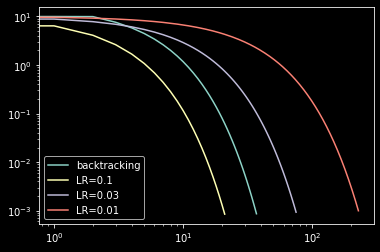

In [6]:
plt.figure()
plt.yscale("log")
plt.xscale("log")
legend=['backtracking','LR=0.1','LR=0.03','LR=0.01']

for i in range(len(x_tot)):
    plt.plot(f_tot[i])
plt.legend(legend)

try:
    X, Y = np.mgrid[-1:5:0.05, -2:5:0.05]

    x_=np.reshape(X,(-1,))                           # calculate the funcion in some points to plot the surface
    y_=np.reshape(Y,(-1,))
    Z=[f([x_[i],y_[i]]) for i in range(len(x_)) ]
    Z=np.reshape(Z,X.shape)


    fig = go.Figure()

    fig.add_surface(    # add the surface of the function
            x=X,
            y=Y,
            z=Z, 
            opacity=0.6,
            showscale=False
            ),


    for i in range(len(x_tot)):
        fig.add_scatter3d(          # add the lines of the runs
                x=x_tot[i][:,0], 
                y=x_tot[i][:,1], 
                z=f_tot[i], 
                marker= dict(size=3, ),
                name=legend[i]),
        
    fig.update_layout(          # increase size of the output
            autosize=False,
            width=800,
            height=700)

    fig.show()

finally:
    pass


---

# Test funciton 2

$f(x1, x2) = 10(x_1 − 1)^2 + (x_2 − 2)^2$

We are going to test the the GD methon on the function with and without backtracking.

Since this problem starts to be ill conditioned we are goint to plot with Learning Rate of $0.1$,  $0.08$,  $0.06$,  $0.04$, $0.02$ and $0.001$ (way smaller to see the difference) to better understand the behaviour of the method.

In [7]:
if True:
    x0 = np.asarray([0,0])

    f= lambda x: f2(x)
    grad_f= lambda x: grad_f2(x)

    kmax = 10000
    tolf = 1e-4
    tolx = 1e-6

    x_tot=[]
    f_tot=[]

    x, k, f_val, grads, err = gradient_descent(f, grad_f, x0, kmax, tolf, tolx, useBackTracking=True)
    x_tot.append(x)
    f_tot.append(f_val)

    x, k, f_val, grads, err = gradient_descent(f, grad_f, x0, kmax, tolf, tolx, LR=0.1 ,useBackTracking=False)
    x_tot.append(x)
    f_tot.append(f_val)

    x, k, f_val, grads, err = gradient_descent(f, grad_f, x0, kmax, tolf, tolx, LR=0.08 ,useBackTracking=False)
    x_tot.append(x)
    f_tot.append(f_val) 

    x, k, f_val, grads, err = gradient_descent(f, grad_f, x0, kmax, tolf, tolx, LR=0.06 ,useBackTracking=False)
    x_tot.append(x)
    f_tot.append(f_val)

    x, k, f_val, grads, err = gradient_descent(f, grad_f, x0, kmax, tolf, tolx, LR=0.04 ,useBackTracking=False)
    x_tot.append(x)
    f_tot.append(f_val)

    x, k, f_val, grads, err = gradient_descent(f, grad_f, x0, kmax, tolf, tolx, LR=0.02 ,useBackTracking=False)
    x_tot.append(x)
    f_tot.append(f_val)

    x, k, f_val, grads, err = gradient_descent(f, grad_f, x0, kmax, tolf, tolx, LR=0.001 ,useBackTracking=False)
    x_tot.append(x)
    f_tot.append(f_val)

We are going to plot the error and, since it's only a bivariate funciton, plot it in 3d in an animated figure

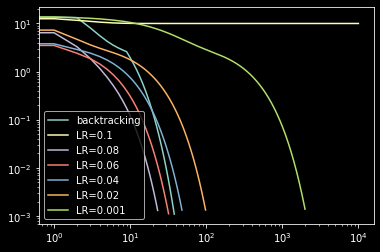

In [8]:
plt.figure()
plt.yscale("log")
plt.xscale("log")
legend=['backtracking','LR=0.1','LR=0.08','LR=0.06','LR=0.04','LR=0.02','LR=0.001']

for i in range(len(x_tot)):
    plt.plot(f_tot[i])
plt.legend(legend)

try:
    X, Y = np.mgrid[-0.5:2.5:0.05, -0.5:2.5:0.05]

    x_=np.reshape(X,(-1,))                           # calculate the funcion in some points to plot the surface
    y_=np.reshape(Y,(-1,))
    Z=[f([x_[i],y_[i]]) for i in range(len(x_)) ]
    Z=np.reshape(Z,X.shape)


    fig = go.Figure()

    fig.add_surface(    # add the surface of the function
            x=X,
            y=Y,
            z=Z, 
            opacity=0.6,
            showscale=False
            ),


    for i in range(len(x_tot)):
        fig.add_scatter3d(          # add the lines of the runs
                x=x_tot[i][:,0], 
                y=x_tot[i][:,1], 
                z=f_tot[i], 
                marker= dict(size=3, ),
                name=legend[i]),
        
    fig.update_layout(          # increase size of the output
            autosize=False,
            width=800,
            height=700)

    fig.show()

finally:
    pass

As we can see when the learning rate is too high the approximation starts to oscillate back and forth, while if the learning rate is too low the convergence could be too slow (as we'd expect).

In this kind of problem is often used the momentum to dump the oscillations

---

# Test funciton 3

$f(x) = \frac{1}{2}||Ax − b||_2^2$

We are going to test the function with a bunch of different values of n and of LR.

Since we used A=Vander(v), which we know is pretty ill conditioned, we can lower learning rates to behave better

In [32]:
N=[5, 10, 15, 20]

kmax = 10000
tolf = 1e-10
tolx = 1e-10

x_tot_n=[]
f_tot_n=[]

for n_dim in N:

    x_tot=[]
    f_tot=[]

    x0 = np.zeros((n_dim,))

    f= lambda x: f3(x,n_dim)
    grad_f= lambda x: grad_f3(x,n_dim)

    x, k, f_val, grads, err = gradient_descent(f, grad_f, x0, kmax, tolf, tolx, useBackTracking=True)
    x_tot.append(x)
    f_tot.append(f_val)

    x, k, f_val, grads, err = gradient_descent(f, grad_f, x0, kmax, tolf, tolx, LR=0.1 ,useBackTracking=False)
    x_tot.append(x)
    f_tot.append(f_val)

    x, k, f_val, grads, err = gradient_descent(f, grad_f, x0, kmax, tolf, tolx, LR=0.04 ,useBackTracking=False)
    x_tot.append(x)
    f_tot.append(f_val)

    x, k, f_val, grads, err = gradient_descent(f, grad_f, x0, kmax, tolf, tolx, LR=0.01 ,useBackTracking=False)
    x_tot.append(x)
    f_tot.append(f_val)

    x, k, f_val, grads, err = gradient_descent(f, grad_f, x0, kmax, tolf, tolx, LR=0.001 ,useBackTracking=False)
    x_tot.append(x)
    f_tot.append(f_val)

    x_tot_n.append(x_tot)
    f_tot_n.append(f_tot)


<ipython-input-4-7faee90b064d>:39: RuntimeWarning:

overflow encountered in matmul

<ipython-input-4-7faee90b064d>:30: RuntimeWarning:

invalid value encountered in matmul

<ipython-input-4-7faee90b064d>:39: RuntimeWarning:

invalid value encountered in matmul

<ipython-input-3-664d6922970f>:36: RuntimeWarning:

invalid value encountered in subtract



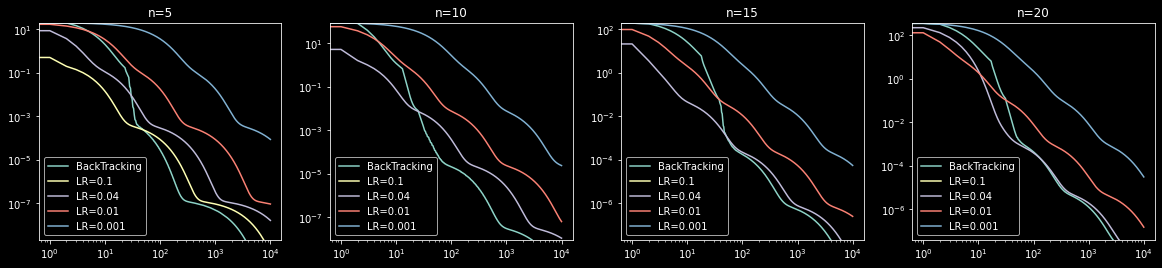

In [45]:
plt.figure(figsize=(20, 4 ))

legend=['BackTracking','LR=0.1','LR=0.04','LR=0.01','LR=0.001']

for i in range(len(x_tot_n)):
    
    plt.subplot(1,len(x_tot_n),i+1)
    plt.title(f"n={N[i]}")

    max_f=min(max([max(f_tot_n[i][j]) for j in range(len(f_tot_n[i]))]),max([f_tot_n[i][j][0] for j in range(len(f_tot_n[i]))]))
    min_f=min([min(f_tot_n[i][j]) for j in range(len(f_tot_n[i]))])
    plt.ylim([min_f,max_f])

    for j in range(len(f_tot_n[i])):
        plt.yscale("log")
        plt.xscale("log")
        plt.plot(f_tot_n[i][j])
        plt.legend(legend)

For small vales of $n$ the function is not too ill conditioned and all the estimations converge.
We can observe that in this case bigger learnin rates allow for faster convergence. We can also see that the backtracking algorithm, while starting slow, then increases the step size and cathes up with the bigger learning rates.

For bigger values of n the problem becomes quite ill conditioned, and the run with LR=1 diverges (error goes to inf). In this case it's evidently necessary a more accurate estimation of the step size. The backtracking still produces good results.

---

# Test funciton 4

$f(x) = \frac{1}{2}||Ax − b||_2^2+\frac{λ}{2}||x||_2^2$

Similar to the previous one, now we introduced the regularization term.

Since the the conbinations of iperparameters start to increase rapidly we are going to test on a small number of values per parameter

In [11]:
L=[0.1, 0.3, 0.5]
N=[5, 10, 15]

kmax = 10000
tolf = 1e-8
tolx = 1e-6

x_tot_L=[]
f_tot_L=[]

for lam in L:

    x_tot_n=[]
    f_tot_n=[]

    for n_dim in N:

        x_tot=[]
        f_tot=[]

        x0 = np.zeros((n_dim,))

        f= lambda x: f4(x,n_dim,lam)
        grad_f= lambda x: grad_f4(x,n_dim,lam)

        x, k, f_val, grads, err = gradient_descent(f, grad_f, x0, kmax, tolf, tolx, useBackTracking=True)
        x_tot.append(x)
        f_tot.append(f_val)

        x, k, f_val, grads, err = gradient_descent(f, grad_f, x0, kmax, tolf, tolx, LR=0.1 ,useBackTracking=False)
        x_tot.append(x)
        f_tot.append(f_val)

        x, k, f_val, grads, err = gradient_descent(f, grad_f, x0, kmax, tolf, tolx, LR=0.01 ,useBackTracking=False)
        x_tot.append(x)
        f_tot.append(f_val)

        x, k, f_val, grads, err = gradient_descent(f, grad_f, x0, kmax, tolf, tolx, LR=0.001 ,useBackTracking=False)
        x_tot.append(x)
        f_tot.append(f_val)

        x_tot_n.append(x_tot)
        f_tot_n.append(f_tot)
    
    x_tot_L.append(x_tot_n)
    f_tot_L.append(f_tot_n)

<ipython-input-4-7faee90b064d>:58: RuntimeWarning:

overflow encountered in matmul

<ipython-input-4-7faee90b064d>:49: RuntimeWarning:

invalid value encountered in matmul

<ipython-input-4-7faee90b064d>:58: RuntimeWarning:

invalid value encountered in matmul

<ipython-input-3-664d6922970f>:36: RuntimeWarning:

invalid value encountered in subtract



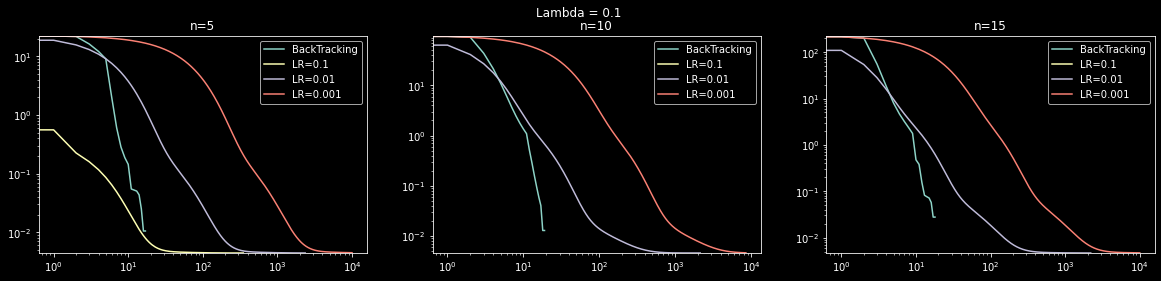

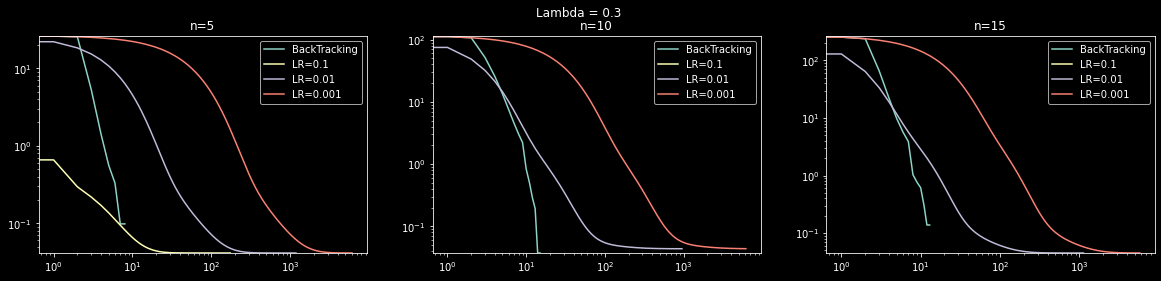

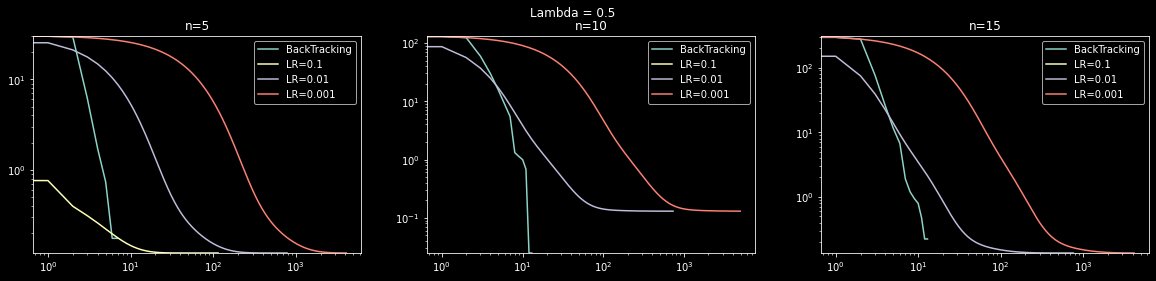

In [48]:
for lam in range(len(L)):
    
    plt.figure(figsize=(20, 4 ))
    
    plt.suptitle(f'Lambda = {L[lam]}')

    legend=['BackTracking','LR=0.1','LR=0.01','LR=0.001']
    
    for i in range(len(f_tot_L[lam])):
        
        plt.subplot(1,len(f_tot_L[lam]),i+1)
        plt.title(f"n={N[i]}")

        max_f=min(max([max(f_tot_L[lam][i][j]) for j in range(len(f_tot_L[lam][i]))]),max([f_tot_L[lam][i][j][0] for j in range(len(f_tot_L[lam][i]))]))
        min_f=min([min(f_tot_L[lam][i][j]) for j in range(len(f_tot_L[lam][i]))])
        plt.ylim([min_f,max_f])

        for j in range(len(f_tot_L[lam][i])):
            plt.yscale("log")
            plt.xscale("log")
            plt.plot(f_tot_L[lam][i][j])
            plt.legend(legend)

The speed with which the error decreases is way slower than the case without the normalization term, the only explaination I can think of is that the shape of the error function is tecnically different so I cannot compare the results together

---

# SGD

While working with Machine Learning (ML) you are usually given a dataset $D = \{(x^{(i)}, y^{(i)})\}^N_{i=1}$ and a
parametric function $f(w; \mathbb{D}) = \sum^N_{i=1} l(w; x^{(i)},y^{(i)})$ where the vector $w$ is usually referred to as the weights
of the model. The training procedure can be written as

$$ w^*=\underset{w}{arg\,min}\;f(w; \mathbb{D}) = \underset{w}{arg\,min\;\sum^N_{i=1} l(w; x^{(i)},y^{(i)})}$$

what is interesting  from the optimization point of view, is that the objective function f(w; D) is
written as a sum of independent terms that are related to datapoints (we will see in the next lab why this
formulation is so common).

Suppose we want to apply GD. Given an initial vector $w_0 ∈ \mathbb{R}^n$, the iteration become

$$w_{k+1}=w_k-\alpha_k \nabla_wf(w_k;\mathbb{D})=w_k-\alpha_k \sum_{i=1}^N \nabla_wl(w_k;x^{(i)},y^{(i)})$$

Thus, to compute the iteration we need the gradient with respect to the weights of the objective functions, that can be computed by summing up the gradients of the independent functions $l(w;x^{(i)},y^{(i)})$.

Unfortunately, even if it is easy to compute the gradient for each of the $l(w;x^{(i)},y^{(i)})$, when the number of samples N is large (which is common in Machine Learning), the computation of the full gradient $∇_wf(w_k; D)$ is prohibitive. For this reason, in such optimization problems, instead of using a standard GD algorithm, it is better using the Stochastic Gradient Descent (SGD) method. That is a variant of the classical GD where, instead of computing $∇_wf(w; D) = \sum^N_{i=1} ∇_wl(w; x^{(i)}, y^{(i)})$, the summation is reduced to a limited numberof terms, called a batch. The idea is the following:

- Given a number $N_{batch}$ (usually called batch size), randomly extract a subdataset $M$ with $|M| = N_{batch}$ from $\mathbb{D}$.

- Approximate the true gradient 
    $$∇_wf(w; D) = \sum^N_{i=1} ∇_wl(w; x^{(i)}, y^{(i)})$$ 
    with 
    $$∇_wf(w; D) = \sum_{i∈\mathbb{M}} ∇_wl(w; x^{(i)}, y^{(i)})$$

- Compute one single iteration of the GD algorithm
$$w_k+1 = w_k − α_k∇w_f(w;M)$$

- Repeat until you have extracted the full dataset. Notice that the random sampling at each iteration is done without replacement.

Each iteration of the algorithm above is usually called batch iteration. When the whole dataset has been
processed, we say that we completed an epoch of the SGD method. This algorithm should be repeated for e
fixed number E of epochs to reach convergence.

Unfortunately, one of the biggest drawbacks of SGD with respect to GD, is that now we cannot check the
convergence anymore (since we can’t obviously compute the gradient of $f(w; D)$ to check its distance from
zero) and we can’t use the backtracking algorithm, for the same reason. As a consequence, the algorithm
will stop ONLY after reaching the fixed number of epochs, and we must set a good value for the step size
αk by hand. Those problems are solved by recent algorithms like SGD with Momentum, Adam, AdaGrad, ...

## Implement SGD function

Q. Write a Python script that implement the SGD algorithm, following the structure you already wrote
for GD. That script should work as follows:

    Input:
    f: the function f(w; D) we want to optimize.
    It is supposed to be a Python function, not an array.
    grad_f: the gradient of f(w; D). It is supposed to be a Python function, not an array.
    w0: an n-dimensional array which represents the initial iterate.
    data: a tuple (x, y) that contains the two arrays x and y, where x is the input data,
    y is the output data.
    batch_size: an integer. The dimension of each batch. Should be a divisor of the number of data.
    n_epochs: an integer. The number of epochs you want to reapeat the iterations.
    
    Output:
    w: an array that contains the value of w_k FOR EACH iterate w_k (not only the latter).
    f_val: an array that contains the value of f(w_k; D)
    FOR EACH iterate w_k ONLY after each epoch.
    grads: an array that contains the value of grad_f(w_k; D)
    FOR EACH iterate w_k ONLY after each epoch.
    err: an array the contains the value of ||grad_f(w_k; D)||_2
    FOR EACH iterate w_k ONLY after each epoch.

In [13]:
def SGD(f, grad_f, w0, data, batch_size, epochs, alpha=0.001):
    
    X=data[0]
    Y=data[1]

    data=np.concatenate([X, np.expand_dims(Y,0)],0)

    data=data.T     #easier to maniputlate batch first

    l=len(data)
    s=X.shape[0]

    n_batch=math.ceil(l/batch_size)
    tot_batch=epochs*n_batch
    
    w = np.empty((tot_batch+1,)+w0.shape)
    f_val = np.empty(tot_batch)
    grads = np.empty((tot_batch,)+w0.shape)
    err = np.empty(tot_batch)
    
    w[0]=w0
    k=0

    for e in range(epochs):

        np.random.shuffle(data)
        

        for b in range(n_batch):

            data_b=data[b*batch_size:min((b+1)*batch_size,l)].T      # take a batch of data

            X_b=data_b[:s]
            Y_b=data_b[s:]

            f_val[k]=f( w[k], (X_b,Y_b) )
            grads[k]=grad_f( w[k], (X_b,Y_b) )
            err[k] = grads[k].T@grads[k]

            w[k+1]=w[k]-alpha*grads[k]

            k+=1
    
    return w[1:], k, f_val, grads, err

## Prepare Dataset and Loss

• To test the script above, construct 3 different dataset in the following way:
1. Generate a true solution $w_{true} = (1, 1, . . . , 1)^T ∈ \mathbb{R}^n$, for a fixed n of your choice.
2. Generate the input data $x ∈ \mathbb{R}^{n×N}$ randomly (np.random.rand).
3. Generate 3 different sets of output data:
    $$ y^{(i)} = w_1x^{(i)}_1 + · · · + w_nx^{(i)}_n \;\;\;\;∀i = 1, . . . , N $$
    $$\tilde y^{(i)} = w_1x^{(i)}_1 + · · · + w_nx^{(i)}_n+η_i\;\;\;\; ∀i = 1, . . . , N $$
    $$z^{(i)} = w_1(x^{(i)}_1)^2 + · · · + w_n(x^{(i)}_n)^2 \;\;\;\;∀i = 1, . . . , N$$
    where $η_i$ is a random value generated by the function np.random.normal(0, sigma, shape)
    where sigma=0.1.
4. For each set of data $(x, y),(x, y˜),(x, z)$, define $f(w; \mathbb{D}) = \sum^N_{i=1}(x^{(i)}· w\, −\, y^{(i)})^2$
 and use it as the
input for your implementation of the SGD algorithm for different batch sizes, number of epochs
and step sizes.


Create the dataset

In [14]:
n_dims=10
N=100

W_true=np.ones((n_dims,))
X=np.random.rand(n_dims,N)

Y   = W_true.T @ X
Y_t = Y+np.random.normal(0, 0.1, Y.shape)
Z   = W_true.T @ np.square(X)

Define the error functions and its gradient

In [15]:
def f(w,D):
    X=D[0]
    Y=D[1]
    y=w.T @ X
    e=y-Y
    return e@e.T

def grad_f(w,D):
    X=D[0]
    Y=D[1]
    y=w.T @ X
    e=y-Y
    return np.squeeze(2*X@e.T)

## Test Dataset 1

In [24]:
w0=np.zeros(n_dims)
data=(X,Y)
epochs=50

batch_size=[5,10,20,50]

w_tot=[]
f_val_tot=[]

for b_s in batch_size:
    w, k, f_val, grads, err = SGD(f, grad_f, w0, data, b_s, epochs, alpha=0.002)
    w_tot.append(w)
    f_val_tot.append(f_val)

Text(0.5, 1.0, 'training error')

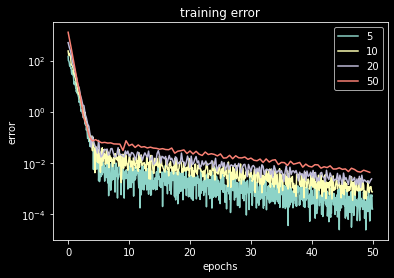

In [17]:
for i in range(len(batch_size)):
    plt.plot(np.arange(len(f_val_tot[i]))*batch_size[i]/X.shape[1],f_val_tot[i])
plt.yscale('log')
plt.legend(batch_size)
plt.xlabel('epochs')
plt.ylabel('error')
plt.title('training error')

This dataset is linear and without errors, the only noise on the convergence is given by the stocasticity of the batches. 

The error is greater on with bigger batch sizes just because it's summed over more elements, other than that the convergence is nearly identical

Plotting the distance between $w$ and $w_{true}$

Text(0.5, 1.0, 'difference between real x and estimated x')

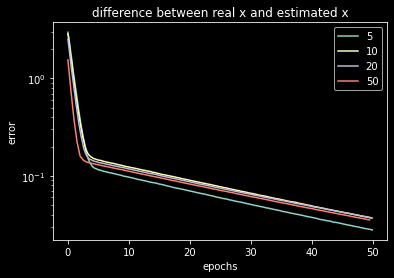

In [18]:
for i in range(len(batch_size)):
    w=w_tot[i]
    print()
    d=w-W_true.T
    n=np.linalg.norm(d,axis=1)
    plt.plot(np.arange(len(n))*batch_size[i]/X.shape[1],n)
    
plt.yscale('log')
plt.legend(batch_size)
plt.xlabel('epochs')
plt.ylabel('error')
plt.title('difference between real x and estimated x')

## Test dataset 2

In [19]:
w0=np.zeros(n_dims)
data=(X,Y_t)
epochs=50

batch_size=[5,10,20,50]

w_tot=[]
f_val_tot=[]

for b_s in batch_size:
    w, k, f_val, grads, err = SGD(f, grad_f, w0, data, b_s, epochs, alpha=0.002)
    w_tot.append(w)
    f_val_tot.append(f_val)

Text(0.5, 1.0, 'training error')

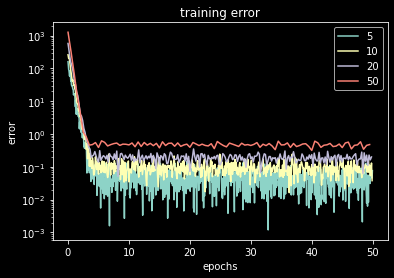

In [20]:
for i in range(len(batch_size)):
    plt.plot(np.arange(len(f_val_tot[i]))*batch_size[i]/X.shape[1],f_val_tot[i])
plt.yscale('log')
plt.legend(batch_size)
plt.xlabel('epochs')
plt.ylabel('error')
plt.title('training error')

Now the noise in the dataset reduces the capability of the sistem of fitting the data, neither we would want to do so, otherwise we would be fitting also the noise. Plotting the distance between $w$ and $w_{true}$ we get

Text(0.5, 1.0, 'difference between real x and estimated x')

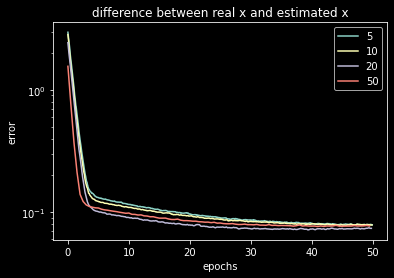

In [21]:
for i in range(len(batch_size)):
    w=w_tot[i]
    print()
    d=w-W_true.T
    n=np.linalg.norm(d,axis=1)
    plt.plot(np.arange(len(n))*batch_size[i]/X.shape[1],n)
    
plt.yscale('log')
plt.legend(batch_size)
plt.xlabel('epochs')
plt.ylabel('error')
plt.title('difference between real x and estimated x')

Were we can se that after a first initial reduction in the difference between $w$ and $w_{true}$ then the model starts to fit the noise decreasing the quality of the results.

This is due to the fact that, while the noise it's i.i.d., training the model for more epochs makes creates correlations even in the noise. Feeding new unseen data instead of doing more epochs would solve this problem (but it's often more expensive)

## Test dataset 3

In [22]:
w0=np.zeros(n_dims)
data=(X,Z)
epochs=30

batch_size=[5,10,20,50]

w_tot=[]
f_val_tot=[]

for b_s in batch_size:
    w, k, f_val, grads, err = SGD(f, grad_f, w0, data, b_s, epochs, alpha=0.001)
    w_tot.append(w)
    f_val_tot.append(f_val)

Text(0.5, 1.0, 'training error')

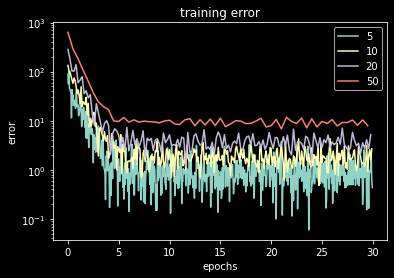

In [23]:
for i in range(len(batch_size)):
    plt.plot(np.arange(len(f_val_tot[i]))*batch_size[i]/X.shape[1],f_val_tot[i])
plt.yscale('log')
plt.legend(batch_size)
plt.xlabel('epochs')
plt.ylabel('error')
plt.title('training error')

Here the underlying data was not linear to begin with, so our linear approximation can only get that far.

Plotting the difference with $w_{true}$ wouldn't make much sense in this case.